<a href="https://colab.research.google.com/github/scsanjay/eda/blob/main/01.%20EDA%20of%20Haberman%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
haberman=pd.read_csv('haberman.csv')

# High level statistics

In [ ]:
haberman.shape

(306, 4)

In [ ]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
haberman.status.unique()

array([1, 2])

In [ ]:
haberman.status = haberman.status.map({1:'yes', 2:'no'})
haberman.status.value_counts()

yes    225
no      81
Name: status, dtype: int64

In [ ]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [ ]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


##Obervations##
1. Total 306 data points available. There is no missing data point.
2. **Features:** age, year and nodes.
3. **Class:** status, 2 classes (*yes means survived 5 or more than years while 2 means survived less than 5 years.*)
4. 81 patients survived less than 5 years and 225 patients survived 5 or more than 5 years. So it's an imbalanced data set.
5. 50% of people operated are between 44 to 60 years of age.
6. 75% of the people have 4 or less lymph nodes.
7. **The real objective is to find whether a person survives more than 5 years or not**.

# Univariate Analysis

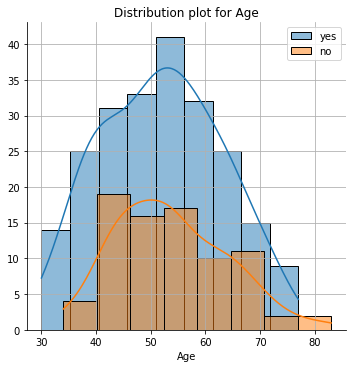

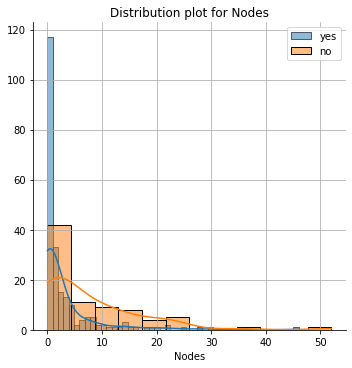

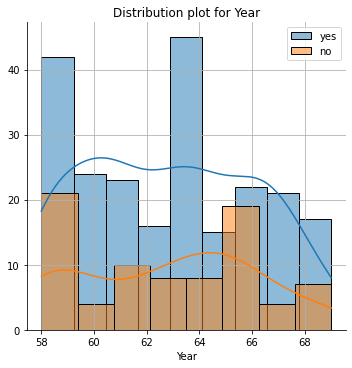

In [ ]:
for i in ['age','nodes','year']:
  sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.histplot, i, kde=True);
  plt.xlabel(i.capitalize())
  plt.title('Distribution plot for '+i.capitalize())
  plt.legend()
  plt.grid()
  plt.show()

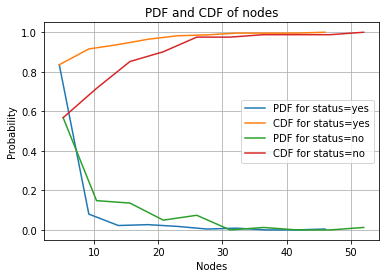

In [ ]:
proportion, bin_edges = np.histogram(haberman.nodes[haberman.status=='yes'], density=True)
pdf = proportion/sum(proportion)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF for status=yes")
plt.plot(bin_edges[1:], cdf, label="CDF for status=yes")
proportion, bin_edges = np.histogram(haberman.nodes[haberman.status=='no'], density=True)
pdf = proportion/sum(proportion)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF for status=no")
plt.plot(bin_edges[1:], cdf, label="CDF for status=no")
plt.title('PDF and CDF of nodes')
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.grid()
plt.show()

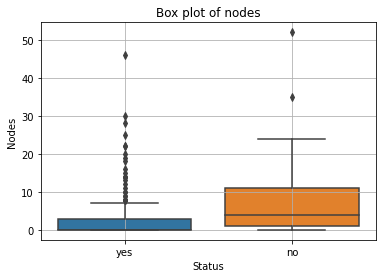

In [ ]:
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('Box plot of nodes')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.grid()
plt.show()

In [ ]:
haberman.nodes[haberman.status=='yes'].describe()

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: nodes, dtype: float64

In [ ]:
haberman.nodes[haberman.status=='no'].describe()

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: nodes, dtype: float64

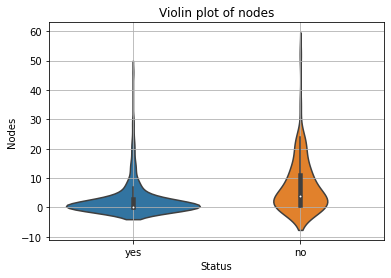

In [ ]:
sns.violinplot(x='status', y='nodes', data=haberman)
plt.title('Violin plot of nodes')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.grid()
plt.show()

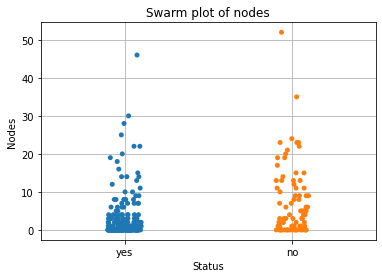

In [ ]:
sns.stripplot(x='status', y='nodes', data=haberman)
plt.title('Swarm plot of nodes')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.grid()
plt.show()

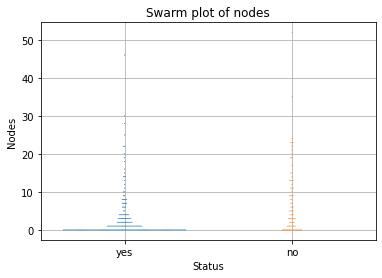

In [ ]:
sns.swarmplot(x='status', y='nodes', data=haberman, size=1)
plt.title('Swarm plot of nodes')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.grid()
plt.show()

## Observations


1.   Patients with 1 or less node are more likely to survive.
2.   Survival chances are lower if age is more than 40
3.   82% of the people who survived have less than equal to 4 nodes
4.   75% of the people who survived have less than equal to 3 nodes
5.   50% of the people who did not survive have more than equal to 4 nodes



# Bi-variate Analysis

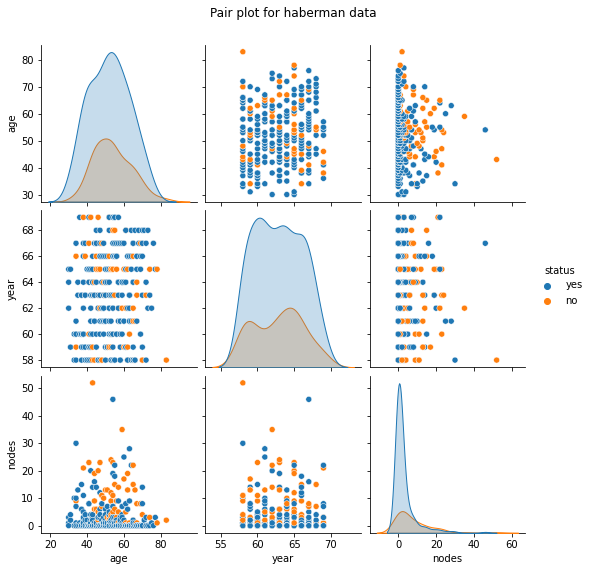

In [ ]:
g = sns.pairplot(haberman, hue='status')
g.fig.suptitle("Pair plot for haberman data", y=1.05)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


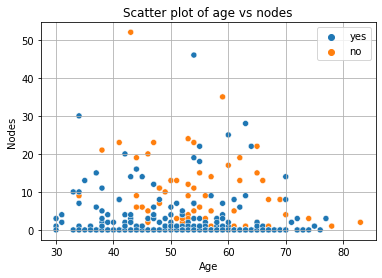

In [ ]:
sns.scatterplot('age', 'nodes', data=haberman, hue='status')
plt.title('Scatter plot of age vs nodes')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.legend()
plt.grid()
plt.show()

## Observations


1.   Only **age** vs **node** graph has little bit seperation.
2.   Lower is the number of nodes the greater is the chance of survival



# Conclusion


1.   Patients less than 40 years are more likely to survive.
2.   Patients with less number of nodes are more likely to survive.
3.   However in case of number of nodes both survived and not survived percentage are higher at less number of nodes. Because 75% of the patients have 4 or less nodes.
4.   The data set is imbalanced and none of the features alone or combined are making any sense. So we can not create an algo for this classification problem.

